In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

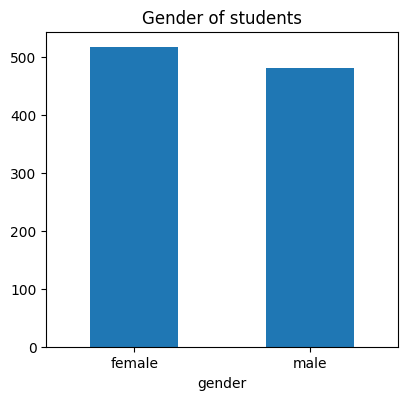

In [7]:
plt.subplot(221)

data['gender'].value_counts().plot.bar(title='Gender of students', figsize=(10,9))

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'standard'), Text(1, 0, 'free/reduced')])

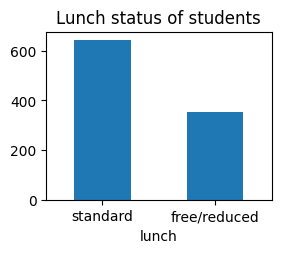

In [8]:
plt.subplot(223)

data['lunch'].value_counts().plot(kind='bar', title='Lunch status of students')

plt.xticks(rotation=0)

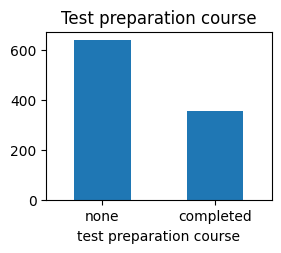

In [10]:
plt.subplot(224)

data['test preparation course'].value_counts().plot(kind='bar', title='Test preparation course')

plt.xticks(rotation=0)

plt.show()

#We can infer many things from the graph. There are more girls in the school than boys.
#The majority of the students belong to groups C and D.
#More than 60% of the students have a standard lunch at school.
#Also, more than 60% of students have not taken any test preparation course.



<Axes: >

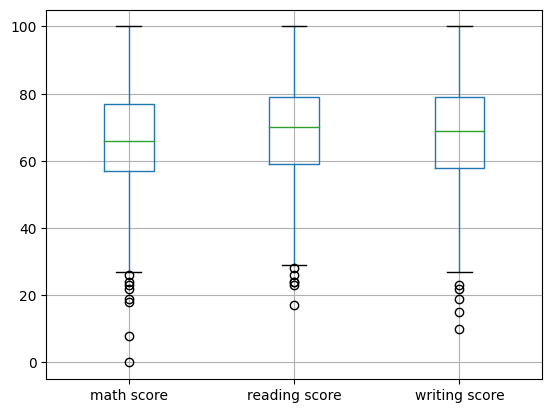

In [11]:
data.boxplot()

<ipython-input-12-d7fd0a2da869>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['math score'])


<Axes: xlabel='math score', ylabel='Density'>

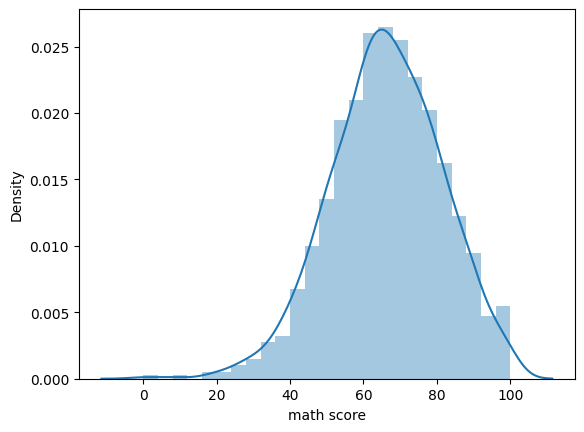

In [12]:
sns.distplot(data['math score'])

<ipython-input-13-15fe27140de3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['reading score'])


<Axes: xlabel='reading score', ylabel='Density'>

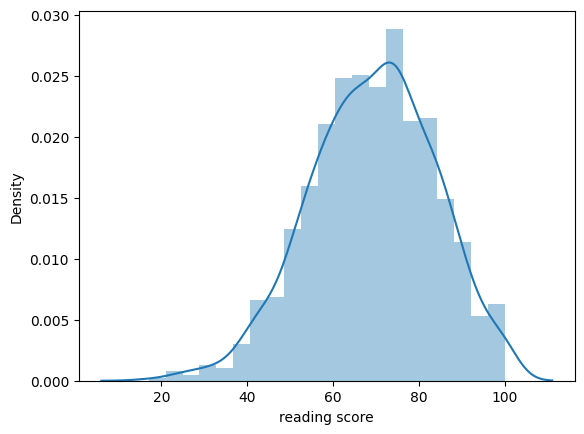

In [13]:
sns.distplot(data['reading score'])

<ipython-input-14-9c88cd08ba17>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['writing score'])


<Axes: xlabel='writing score', ylabel='Density'>

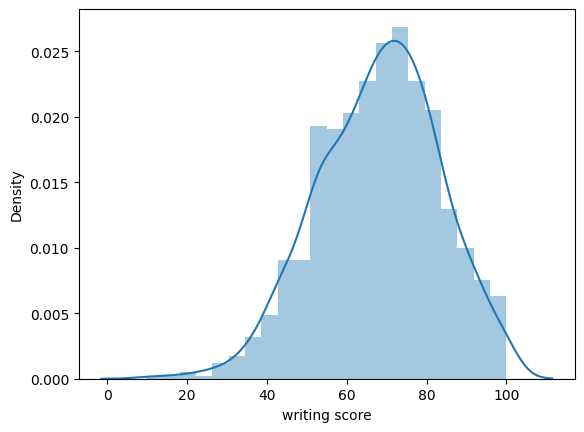

In [14]:
sns.distplot(data['writing score'])

In [16]:
numeric_columns = data.select_dtypes(include=[float, int]).columns
numeric_data = data[numeric_columns]

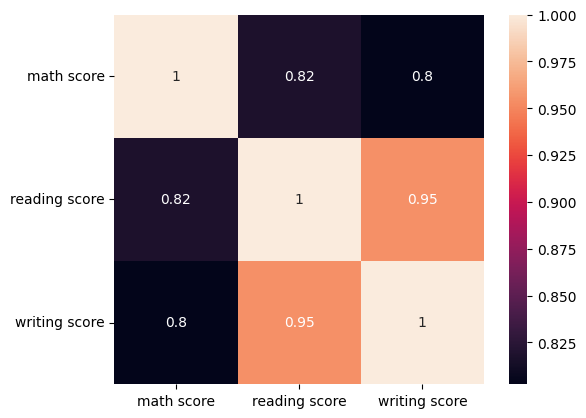

In [17]:
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

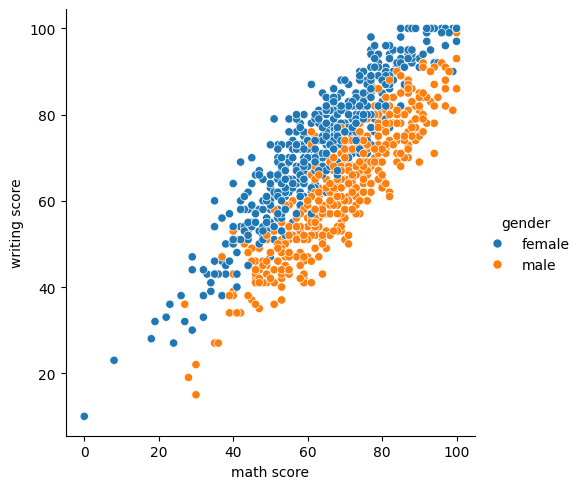

In [18]:
sns.relplot(x='math score', y='writing score', hue='gender', data=data)


<Axes: >

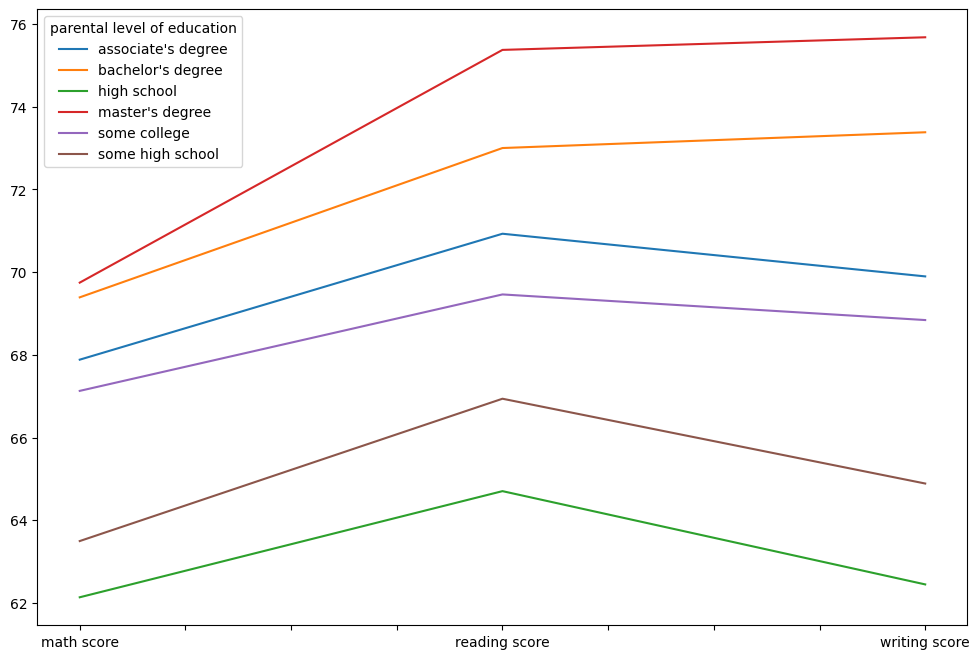

In [19]:
data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().T.plot(figsize=(12,8))

<Axes: >

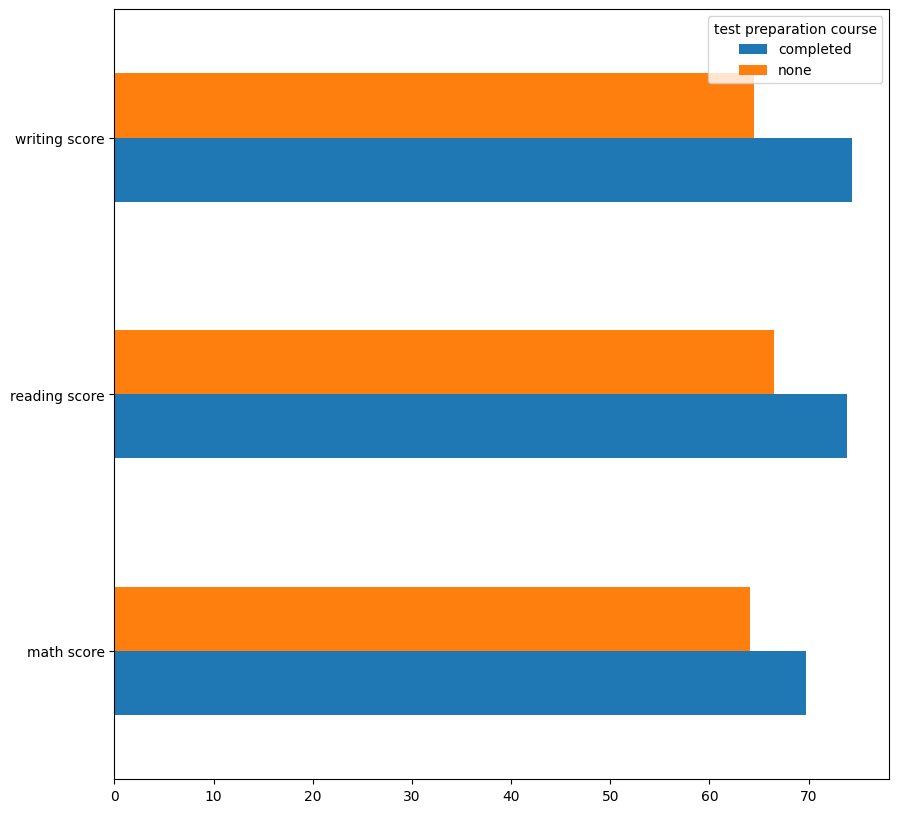

In [20]:
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().T.plot(kind='barh', figsize=(10,10))